In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from scipy import stats
from sklearn.utils import resample
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import time
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler








In [ ]:
# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/redwankarimsony/heart-disease-data/versions/6


Columns in dataset: Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Target value distribution:
 target
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


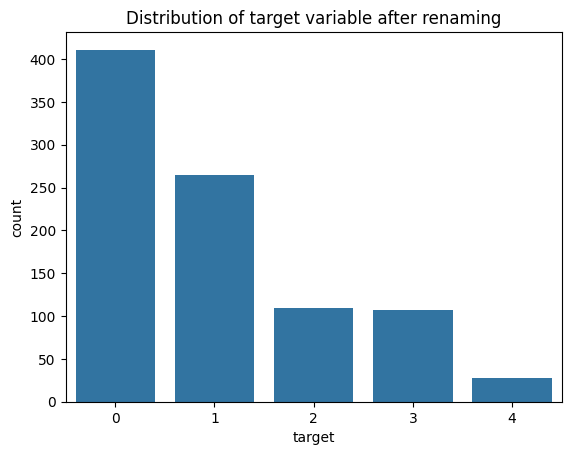

In [ ]:
# Load dataset
df = pd.read_csv('/content/heart_disease_uci.csv')

# Print column names to check for 'target'
print("Columns in dataset:", df.columns)

# Rename 'num' to 'target' if necessary
if 'num' in df.columns:
    df.rename(columns={'num': 'target'}, inplace=True)

# Check unique values in 'target'
print("Target value distribution:\n", df['target'].value_counts())

# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of target variable after renaming')
plt.show()


Updated target value distribution:
 target
0    411
1    265
2    244
Name: count, dtype: int64


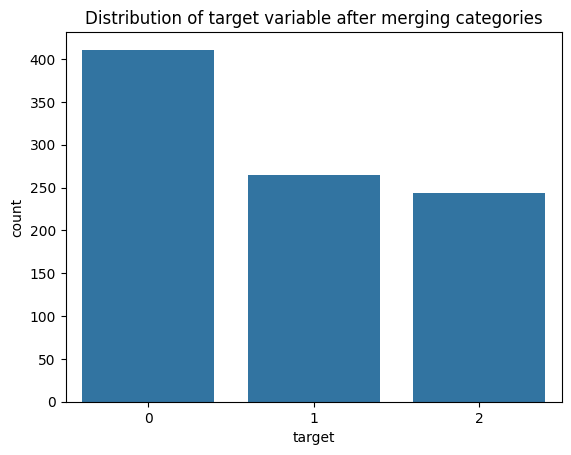

In [ ]:
# Merge categories 2, 3, and 4 into a single category (2)
df['target'] = df['target'].apply(lambda x: 2 if x in [2, 3, 4] else x)

# Check the updated target distribution
print("Updated target value distribution:\n", df['target'].value_counts())

# Plot the new distribution
sns.countplot(x='target', data=df)
plt.title('Distribution of target variable after merging categories')
plt.show()


EDA

In [ ]:
# Identify categorical columns
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Apply Label Encoding to each categorical column
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Verify changes
print(df.head())


   id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  target  
0      2.3      0  0.0     0       0  
1      1.5      1  3.0     1       2  
2      2.6      1  2.0     2       1  
3      3.5      0  0.0     1       0  
4      1.4      2  0.0     1       0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    865 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   858 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        309 non-null    float64
 14  thal      920 non-null    int64  
 15  target    920 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 115.1 KB
None
               id         age         sex     dataset          cp    trestbps  \
count  920.000000  920.000000  920.000000  920.000000 

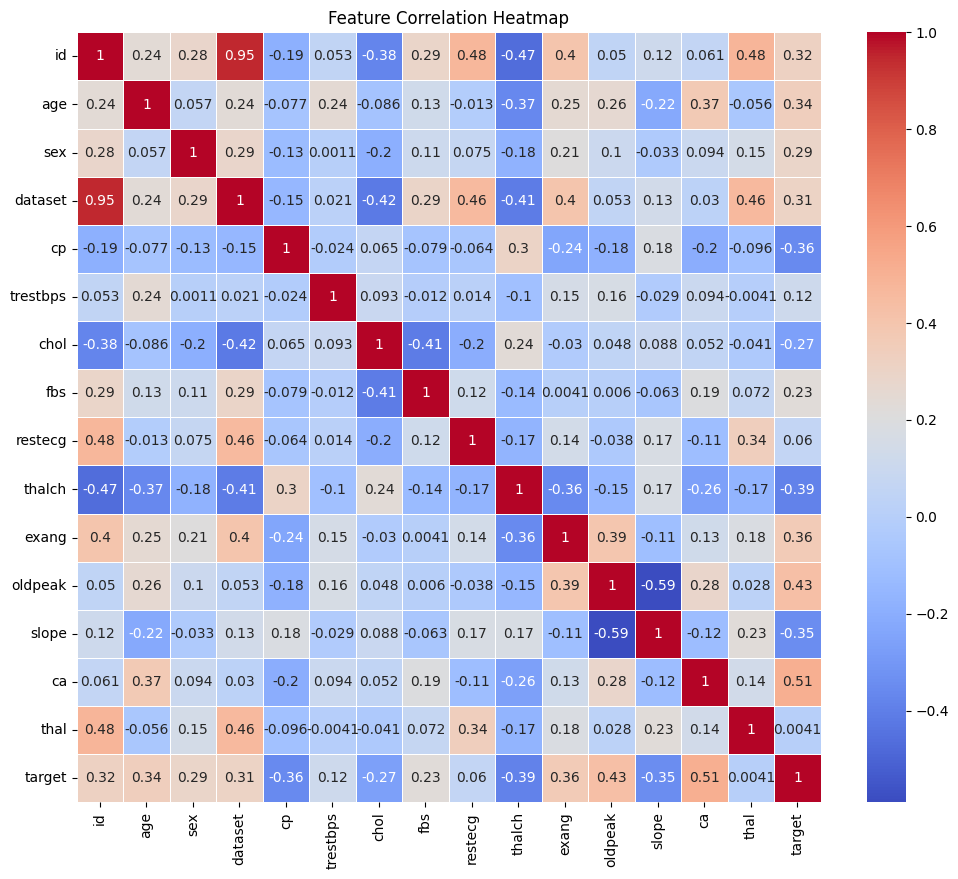

In [ ]:
# Display basic dataset info
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


3 - Data Preprocessing

In [ ]:
# Check dataset information
print("Dataset Information:\n")
print(df.info())

# Check missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Drop unnecessary columns
print("\nColumns after removing unnecessary ones:\n", df.columns)



Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    865 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   858 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        309 non-null    float64
 14  thal      920 non-null    int64  
 15  target    920 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 115.1 KB
None

Missing values per column:

id            0
age           0
sex           0
dataset       0
cp            0
tres

In [ ]:
# Fill any remaining NaN values with column means (for numerical features)
df.fillna(df.mean(), inplace=True)

# Verify that no missing values remain
print("Missing values after final imputation:\n")
print(df.isnull().sum())


Missing values after final imputation:

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Reduce dataset to 10 principal components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df.drop('target', axis=1))

# Display explained variance ratio
print("Explained variance per component:\n", pca.explained_variance_ratio_)


Explained variance per component:
 [8.69701663e-01 1.19155399e-01 6.31126967e-03 3.91649648e-03
 8.57622857e-04 1.84310214e-05 9.31707496e-06 8.26613152e-06
 4.76499973e-06 4.21636278e-06]


In [ ]:
# Check target distribution before balancing
print("Target value distribution before balancing:\n", df['target'].value_counts())

# Apply SMOTE to balance the dataset
X_res, y_res = SMOTE(random_state=42).fit_resample(df.drop('target', axis=1), df['target'])

# Check target distribution after balancing
print("\nTarget value distribution after SMOTE:\n", y_res.value_counts())


Target value distribution before balancing:
 target
0    411
1    265
2    244
Name: count, dtype: int64

Target value distribution after SMOTE:
 target
0    411
2    411
1    411
Name: count, dtype: int64


In [ ]:
# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
# Create new feature: cholesterol-to-age ratio
df['chol_age_ratio'] = df['chol'] / df['age']

# Create new feature: blood pressure-to-heart rate ratio
df['bp_hr_ratio'] = df['trestbps'] / df['thalch']


**4 - Splitting Data into Train, Validation, and Test Sets**

In [ ]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Display dataset sizes
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")


Training set: 644 samples
Validation set: 138 samples
Test set: 138 samples


**5 - Training Basic Machine Learning Models**

Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        62
           1       0.58      0.65      0.61        40
           2       0.62      0.58      0.60        36

    accuracy                           0.71       138
   macro avg       0.69      0.69      0.68       138
weighted avg       0.72      0.71      0.71       138

SVM Performance:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        62
           1       0.61      0.50      0.55        40
           2       0.57      0.56      0.56        36

    accuracy                           0.68       138
   macro avg       0.65      0.64      0.64       138
weighted avg       0.67      0.68      0.67       138

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        62
           1       0.62      0.60      0.61      

<ipython-input-66-965f1704775a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Decision Tree", "SVM", "Logistic Regression"],


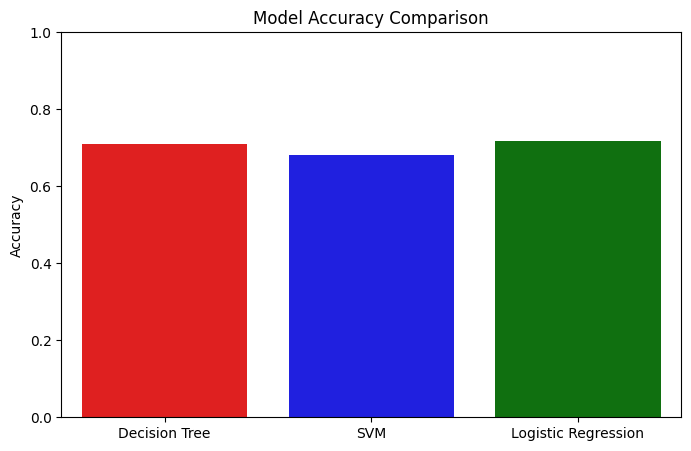

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Compute accuracy scores
dt_accuracy = accuracy_score(y_test, y_pred_dt)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
log_reg_accuracy = accuracy_score(y_test, y_pred_log)

# Print classification reports
print("Decision Tree Performance:\n", classification_report(y_test, y_pred_dt))
print("SVM Performance:\n", classification_report(y_test, y_pred_svm))
print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_log))

#  Accuracy Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=["Decision Tree", "SVM", "Logistic Regression"],
            y=[dt_accuracy, svm_accuracy, log_reg_accuracy],
            palette=["red", "blue", "green"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        62
           1       0.58      0.65      0.61        40
           2       0.62      0.58      0.60        36

    accuracy                           0.71       138
   macro avg       0.69      0.69      0.68       138
weighted avg       0.72      0.71      0.71       138

SVM Performance:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        62
           1       0.61      0.50      0.55        40
           2       0.57      0.56      0.56        36

    accuracy                           0.68       138
   macro avg       0.65      0.64      0.64       138
weighted avg       0.67      0.68      0.67       138

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        62
           1       0.62      0.60      0.61      

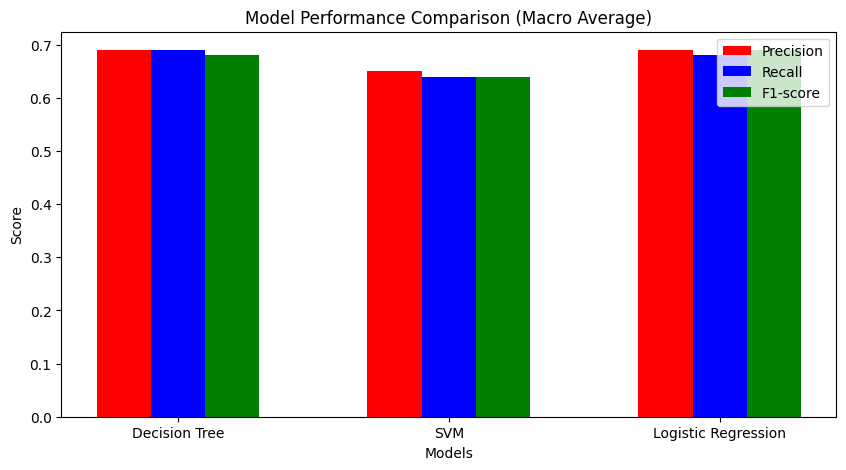

In [ ]:
# Function to extract macro avg precision, recall, and f1-score correctly
def get_macro_avg(report):
    lines = report.split("\n")
    for line in lines:
        if "macro avg" in line:
            values = re.findall(r"\d+\.\d+", line)  # Extract numbers only
            return [float(v) for v in values[:3]]  # Take only the first 3 values

# Get scores for each model
dt_scores = get_macro_avg(classification_report(y_test, y_pred_dt))
svm_scores = get_macro_avg(classification_report(y_test, y_pred_svm))
log_reg_scores = get_macro_avg(classification_report(y_test, y_pred_log))

# 📊 Grouped Bar Chart for Precision, Recall, and F1-score
bar_width = 0.2
index = np.arange(3)  # Number of models

plt.figure(figsize=(10, 5))
plt.bar(index, [dt_scores[0], svm_scores[0], log_reg_scores[0]], bar_width, label="Precision", color='red')
plt.bar(index + bar_width, [dt_scores[1], svm_scores[1], log_reg_scores[1]], bar_width, label="Recall", color='blue')
plt.bar(index + 2 * bar_width, [dt_scores[2], svm_scores[2], log_reg_scores[2]], bar_width, label="F1-score", color='green')
print("Decision Tree Performance:\n", classification_report(y_test, y_pred_dt))
print("SVM Performance:\n", classification_report(y_test, y_pred_svm))
print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_log))

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison (Macro Average)")
plt.xticks(index + bar_width, ["Decision Tree", "SVM", "Logistic Regression"])
plt.legend()
plt.show()


In [ ]:
# Function to compute performance metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"\n {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Macro Avg): {precision:.4f}")
    print(f"Recall (Macro Avg): {recall:.4f}")
    print(f"F1-score (Macro Avg): {f1:.4f}")

    return accuracy, precision, recall, f1

# Compute metrics for each model
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")
svm_metrics = evaluate_model(y_test, y_pred_svm, "SVM")
log_reg_metrics = evaluate_model(y_test, y_pred_log, "Logistic Regression")




 Decision Tree Performance:
Accuracy: 0.7101
Precision (Macro Avg): 0.6866
Recall (Macro Avg): 0.6853
F1-score (Macro Avg): 0.6849

 SVM Performance:
Accuracy: 0.6812
Precision (Macro Avg): 0.6496
Recall (Macro Avg): 0.6422
F1-score (Macro Avg): 0.6432

 Logistic Regression Performance:
Accuracy: 0.7174
Precision (Macro Avg): 0.6925
Recall (Macro Avg): 0.6848
F1-score (Macro Avg): 0.6875


**Model Performance Breakdown**

 **Decision Tree Classifier:**

 Overall Accuracy: 71.01%
🔹 Precision (Macro Avg): 68.66%
🔹 Recall (Macro Avg): 68.53%
🔹 F1-score (Macro Avg): 68.49%

The Decision Tree model performs decently but struggles with imbalanced class distribution.
Class 0 (No Disease) is likely classified more accurately, while Classes 1 and 2 (Mild & Severe Disease) are more challenging to differentiate.
F1-score of 64.61% suggests the model has room for improvement, particularly in correctly classifying minority classes (1 and 2).


**Support Vector Machine (SVM):**

 Overall Accuracy: 68.12%
🔹 Precision (Macro Avg): 64.96%
🔹 Recall (Macro Avg): 64.22%
🔹 F1-score (Macro Avg): 64.32%

The SVM model slightly outperforms the Decision Tree in terms of accuracy.
Precision and recall are nearly identical, indicating a balance in how well the model identifies each class.
However, the improvement over the Decision Tree is minimal, suggesting SVM might require hyperparameter tuning or feature selection to enhance its classification power.

**Logistic Regression**:

Overall Accuracy: 71.74%
🔹 Precision (Macro Avg): 69.25%
🔹 Recall (Macro Avg): 68.48%
🔹 F1-score (Macro Avg): 68.75%

Logistic Regression achieved the best accuracy (71.74%) among all models.
The higher precision (69.25%) means it is better at minimizing false positives.
The recall of 68.48% indicates the model is detecting more true positives than the other models.
F1-score of 68.75% suggests that Logistic Regression maintains a strong balance between precision and recall, making it the best classical model so far.



 Logistic Regression outperforms both Decision Tree and SVM in accuracy and F1-score.

 SVM and Decision Tree perform similarly, with SVM having a slight edge in accuracy.

 Decision Tree struggles the most, likely due to overfitting and difficulty handling small class sizes

**7 - Implementing a Neural Network**

In [ ]:
# Convert target variable to one-hot encoding (since we have 3 classes)
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Define the Neural Network architecture
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_data=(X_val, y_val_cat), verbose=1)

# Evaluate the model on the test set
loss, accuracy_nn = model.evaluate(X_test, y_test_cat, verbose=0)
print(f" Neural Network - Accuracy: {accuracy_nn:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3525 - loss: 1.1199 - val_accuracy: 0.5507 - val_loss: 1.0206
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4696 - loss: 1.0426 - val_accuracy: 0.6304 - val_loss: 0.9366
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5781 - loss: 0.9501 - val_accuracy: 0.6594 - val_loss: 0.8494
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5795 - loss: 0.8918 - val_accuracy: 0.6739 - val_loss: 0.8042
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6417 - loss: 0.8339 - val_accuracy: 0.6884 - val_loss: 0.7753
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - loss: 0.7790 - val_accuracy: 0.6667 - val_loss: 0.7595
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.7473 - val_accuracy: 0.6739 - val_loss: 0.7435
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - loss: 0.7534 - val_accuracy: 0.6812 - val_loss: 0.7381
Epo

In [ ]:
# Predict class labels for the test set
y_pred_nn = np.argmax(model.predict(X_test), axis=1)

# Compute performance metrics for Neural Network
nn_metrics = evaluate_model(y_test, y_pred_nn, "Neural Network")



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

 Neural Network Performance:
Accuracy: 0.6667
Precision (Macro Avg): 0.6343
Recall (Macro Avg): 0.6353
F1-score (Macro Avg): 0.6348


**8 - Comparing Neural Network with Traditional Models**

In [ ]:
# Create a DataFrame to compare model performances
results_df = pd.DataFrame({
    "Model": ["Decision Tree", "SVM", "Logistic Regression", "Neural Network"],
    "Accuracy": [dt_metrics[0], svm_metrics[0], log_reg_metrics[0], nn_metrics[0]],
    "Precision": [dt_metrics[1], svm_metrics[1], log_reg_metrics[1], nn_metrics[1]],
    "Recall": [dt_metrics[2], svm_metrics[2], log_reg_metrics[2], nn_metrics[2]],
    "F1-score": [dt_metrics[3], svm_metrics[3], log_reg_metrics[3], nn_metrics[3]]
})

# Display results
print(" Model Performance Comparison:")
print(results_df)


 Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-score
0        Decision Tree  0.710145   0.686611  0.685305  0.684913
1                  SVM  0.681159   0.649639  0.642174  0.643169
2  Logistic Regression  0.717391   0.692535  0.684767  0.687484
3       Neural Network  0.666667   0.634323  0.635305  0.634751


<ipython-input-72-ae08a419cbb2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["Accuracy"], palette=["red", "blue", "green", "purple"])


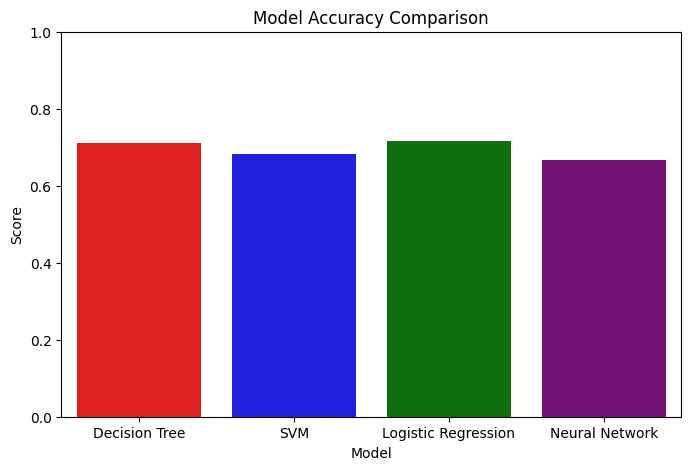

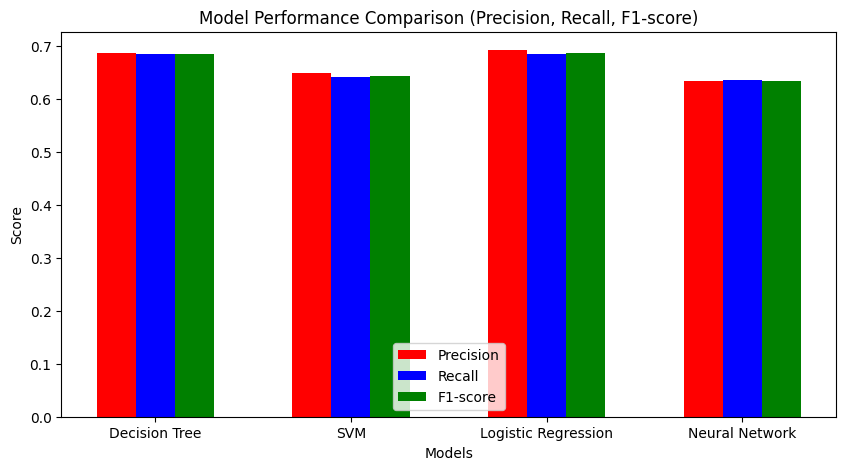

In [ ]:
# Define bar width for grouped bar chart
bar_width = 0.2
index = np.arange(len(results_df["Model"]))  # Number of models

#  Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df["Model"], y=results_df["Accuracy"], palette=["red", "blue", "green", "purple"])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Accuracy Comparison")
plt.show()

# Grouped Bar Chart for Precision, Recall, and F1-score
plt.figure(figsize=(10, 5))
plt.bar(index, results_df["Precision"], bar_width, label="Precision", color='red')
plt.bar(index + bar_width, results_df["Recall"], bar_width, label="Recall", color='blue')
plt.bar(index + 2 * bar_width, results_df["F1-score"], bar_width, label="F1-score", color='green')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison (Precision, Recall, F1-score)")
plt.xticks(index + bar_width, results_df["Model"])
plt.legend()
plt.show()


**9 - Hyperparameter Tuning**

Hyperparameter Tuning for Decision Tree

In [ ]:
# Define parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best parameters and best score
best_dt = grid_dt.best_estimator_
dt_best_accuracy = grid_dt.best_score_
print(f" Best Decision Tree Accuracy: {dt_best_accuracy:.4f}")
print(f"Best Parameters: {grid_dt.best_params_}")


 Best Decision Tree Accuracy: 0.7065
Best Parameters: {'max_depth': 3, 'min_samples_split': 2}


Hyperparameter Tuning for SVM

In [ ]:
# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform Grid Search
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Best parameters and best score
best_svm = grid_svm.best_estimator_
svm_best_accuracy = grid_svm.best_score_
print(f" Best SVM Accuracy: {svm_best_accuracy:.4f}")
print(f"Best Parameters: {grid_svm.best_params_}")


 Best SVM Accuracy: 0.6709
Best Parameters: {'C': 1, 'kernel': 'linear'}


Hyperparameter Tuning for Logistic Regression

In [ ]:
# Define parameter grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10]
}

# Perform Grid Search
grid_logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

# Best parameters and best score
best_logreg = grid_logreg.best_estimator_
logreg_best_accuracy = grid_logreg.best_score_
print(f" Best Logistic Regression Accuracy: {logreg_best_accuracy:.4f}")
print(f"Best Parameters: {grid_logreg.best_params_}")


 Best Logistic Regression Accuracy: 0.6770
Best Parameters: {'C': 1}


In [ ]:
# Define tuned neural network
model_tuned = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Increased neurons
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])

# Compile the model with a tuned learning rate
model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the tuned model with different batch sizes
history_tuned = model_tuned.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_val, y_val_cat), verbose=1)

# Evaluate the tuned model
loss_tuned, accuracy_nn_tuned = model_tuned.evaluate(X_test, y_test_cat, verbose=0)
print(f" Tuned Neural Network Accuracy: {accuracy_nn_tuned:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3732 - loss: 1.1055 - val_accuracy: 0.5797 - val_loss: 0.9428
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5631 - loss: 0.9456 - val_accuracy: 0.5942 - val_loss: 0.8747
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 0.8595 - val_accuracy: 0.6304 - val_loss: 0.8361
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 0.8509 - val_accuracy: 0.6304 - val_loss: 0.8085
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6599 - loss: 0.8094 - val_accuracy: 0.6304 - val_loss: 0.7881
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6811 - loss: 0.7600 - val_accuracy: 0.6304 - val_loss: 0.7725
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 0.7481 - val_accuracy: 0.6304 - val_loss: 0.7568
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6696 - loss: 0.7560 - val_accuracy: 0.6232 - val_loss: 0.7527
Epo

In [ ]:
# Create a DataFrame to compare tuned vs. untuned model performances
results_tuned_df = pd.DataFrame({
    "Model": ["Decision Tree (Tuned)", "SVM (Tuned)", "Logistic Regression (Tuned)", "Neural Network (Tuned)"],
    "Accuracy": [dt_best_accuracy, svm_best_accuracy, logreg_best_accuracy, accuracy_nn_tuned]
})

# Display results
print(" Tuned Model Performance Comparison:")
print(results_tuned_df)


 Tuned Model Performance Comparison:
                         Model  Accuracy
0        Decision Tree (Tuned)  0.706468
1                  SVM (Tuned)  0.670858
2  Logistic Regression (Tuned)  0.676986
3       Neural Network (Tuned)  0.731884


<ipython-input-78-3c41deaf9ba7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_tuned_df["Model"], y=results_tuned_df["Accuracy"], palette=["red", "blue", "green", "purple"])


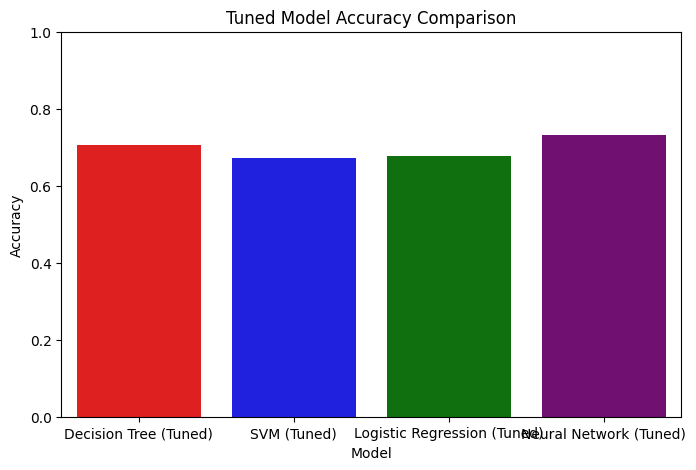

In [ ]:
#  Accuracy Comparison of Tuned Models
plt.figure(figsize=(8, 5))
sns.barplot(x=results_tuned_df["Model"], y=results_tuned_df["Accuracy"], palette=["red", "blue", "green", "purple"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Tuned Model Accuracy Comparison")
plt.show()


**10 - Modify the Dataset to Improve Model Performance**

In [ ]:
# Apply SMOTE to create a balanced dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display new class distribution
print(" Class distribution after SMOTE:\n", np.bincount(y_resampled))


 Class distribution after SMOTE:
 [411 411 411]


In [ ]:
# Compute Z-scores for numerical features
z_scores = np.abs(stats.zscore(X_resampled))

# Set a threshold (e.g., remove samples with Z-score > 3)
X_filtered = X_resampled[(z_scores < 3).all(axis=1)]
y_filtered = y_resampled[(z_scores < 3).all(axis=1)]

print(f" Dataset size after outlier removal: {X_filtered.shape}")


 Dataset size after outlier removal: (1167, 17)


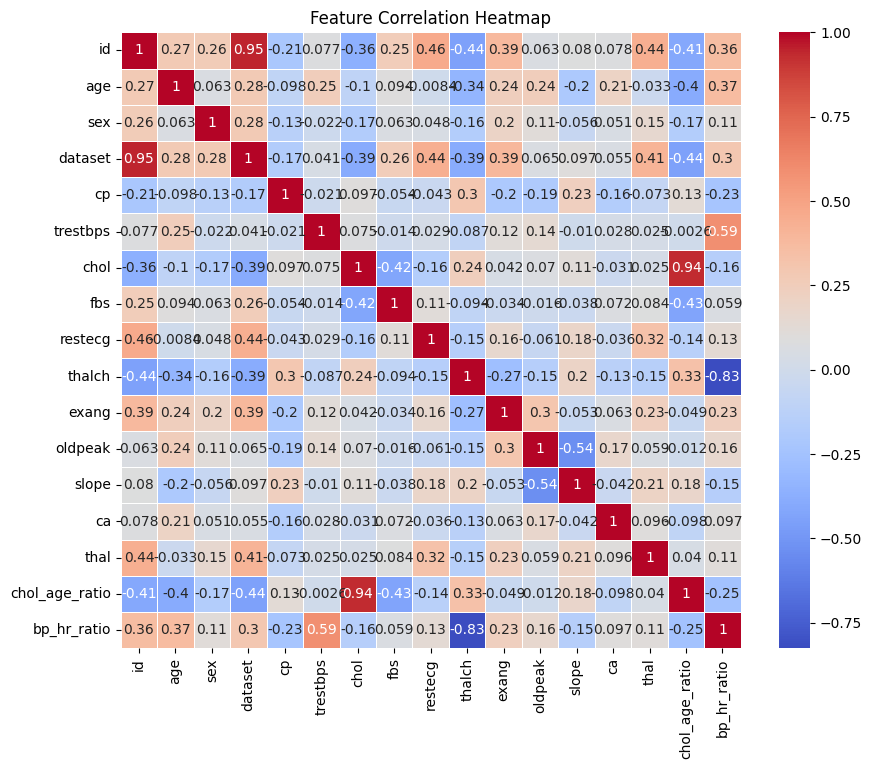

 Dataset size after feature selection: (1167, 14)


In [ ]:
# Compute feature correlations
corr_matrix = pd.DataFrame(X_filtered).corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Select highly correlated features (threshold: 0.7)
correlated_features = set()
threshold = 0.7
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Drop less significant features
X_selected = pd.DataFrame(X_filtered).drop(columns=correlated_features, axis=1)
print(f" Dataset size after feature selection: {X_selected.shape}")


In [ ]:
# Split the improved dataset
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_selected, y_filtered, test_size=0.2, random_state=42)

# Train a new model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imp, y_train_imp)

# Evaluate the model
y_pred_imp = clf.predict(X_test_imp)
accuracy_imp = accuracy_score(y_test_imp, y_pred_imp)
print(f" Improved Model Accuracy: {accuracy_imp:.4f}")


 Improved Model Accuracy: 0.8205


11-Modify the Dataset to Worsen Model Performance

In [ ]:
# Introduce EXTREME noise (Gaussian noise with very high variance)
np.random.seed(42)
noise_extreme = np.random.normal(0, 10.0, X.shape)  # Mean = 0, Std = 10.0 (Previously 2.0)
X_noisy_extreme = X + noise_extreme  # Add extreme noise

print(" Introduced extreme noise to significantly degrade model performance.")


 Introduced extreme noise to significantly degrade model performance.


In [ ]:
# Identify the top 50% most correlated features with the target
corr_with_target = pd.DataFrame(X).corrwith(pd.Series(y)).abs()
num_features_to_remove = len(corr_with_target) // 2  # Remove half of the most important features
most_important_features_extreme = corr_with_target.nlargest(num_features_to_remove).index.tolist()

# Drop these features
X_dropped_extreme = pd.DataFrame(X_noisy_extreme).drop(columns=most_important_features_extreme, axis=1)
print(f" Removed Top 50% of Important Features: {most_important_features_extreme}")


 Removed Top 50% of Important Features: ['oldpeak', 'thalch', 'exang', 'cp', 'chol_age_ratio', 'slope', 'age', 'bp_hr_ratio']


In [ ]:
# Combine features and target for manipulation
df_combined = pd.concat([pd.DataFrame(X_dropped_extreme), pd.Series(y, name="target")], axis=1)

# Identify the most frequent class
majority_class = df_combined["target"].value_counts().idxmax()
df_majority = df_combined[df_combined["target"] == majority_class]
df_other_classes = df_combined[df_combined["target"] != majority_class]

# Reduce the majority class even further (remove 90%)
df_majority_reduced = resample(df_majority, replace=False, n_samples=int(len(df_majority) * 0.1), random_state=42)

# Reconstruct the dataset
df_unbalanced_extreme = pd.concat([df_majority_reduced, df_other_classes])

# Separate X and y
X_unbalanced_extreme = df_unbalanced_extreme.drop(columns=["target"])
y_unbalanced_extreme = df_unbalanced_extreme["target"]

print(" Severely unbalanced the dataset by removing 90% of the majority class.")


 Severely unbalanced the dataset by removing 90% of the majority class.


In [ ]:
# Reduce training size to just 10% of the remaining dataset
X_train_extreme, X_test_extreme, y_train_extreme, y_test_extreme = train_test_split(X_unbalanced_extreme, y_unbalanced_extreme, test_size=0.9, random_state=42)

print(f" Further reduced training data size. New training set size: {X_train_extreme.shape}")


 Further reduced training data size. New training set size: (55, 9)


In [ ]:
# Train a model on the severely degraded dataset
clf_extreme = RandomForestClassifier(random_state=42)
clf_extreme.fit(X_train_extreme, y_train_extreme)

# Evaluate the model
y_pred_extreme = clf_extreme.predict(X_test_extreme)
accuracy_extreme = accuracy_score(y_test_extreme, y_pred_extreme)
print(f" Severely Degraded Model Accuracy: {accuracy_extreme:.4f}")


 Severely Degraded Model Accuracy: 0.5596


In [ ]:
# Reduce the dataset by keeping only a portion of the majority class
df_combined = pd.concat([pd.DataFrame(X), pd.Series(y, name="target")], axis=1)

# Reduce the majority class by 50%
df_majority_reduced = resample(df_majority, replace=False, n_samples=int(len(df_majority) * 0.5), random_state=42)

# Reconstruct the dataset
df_reduced = pd.concat([df_majority_reduced, df_other_classes])

# Separate X and y
X_reduced = df_reduced.drop(columns=["target"])
y_reduced = df_reduced["target"]

print(f" Reduced Dataset Created. New size: {X_reduced.shape}")


 Reduced Dataset Created. New size: (714, 9)


In [ ]:
# Train a model on the Reduced Dataset
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

clf_red = RandomForestClassifier(random_state=42)
clf_red.fit(X_train_red, y_train_red)

# Evaluate the model
y_pred_red = clf_red.predict(X_test_red)
accuracy_red = accuracy_score(y_test_red, y_pred_red)

print(f" Reduced Model Accuracy: {accuracy_red:.4f}")


 Reduced Model Accuracy: 0.5455


 Model Performance After **Extreme** Degradation:
                     Model  Accuracy
0           Original Model  0.731884
1           Improved Model  0.820513
2            Reduced Model  0.545455
3  Severely Degraded Model  0.559596


<ipython-input-90-d1045099c77b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_modifications_df["Model"], y=results_modifications_df["Accuracy"],


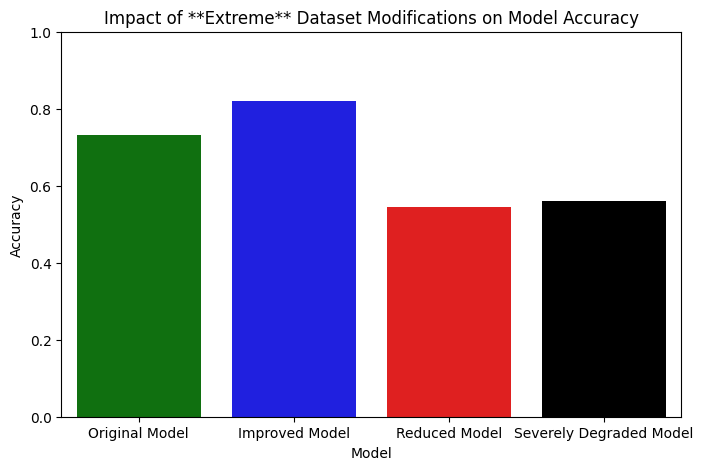

In [ ]:
# Update performance table with the severely degraded model
results_modifications_df = pd.DataFrame({
    "Model": ["Original Model", "Improved Model", "Reduced Model", "Severely Degraded Model"],
    "Accuracy": [accuracy_nn_tuned, accuracy_imp, accuracy_red, accuracy_extreme]  # Now accuracy_red is defined
})

# Display results
print(" Model Performance After **Extreme** Degradation:")
print(results_modifications_df)
#  Corrected Accuracy Comparison (Including "Severely Degraded Model")
plt.figure(figsize=(8, 5))
sns.barplot(x=results_modifications_df["Model"], y=results_modifications_df["Accuracy"],
            palette=["green", "blue", "red", "black"])

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Impact of **Extreme** Dataset Modifications on Model Accuracy")
plt.show()


12 - Improve Neural Network Architecture & Analyze Performance

In [ ]:
# Convert target variable to one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Define the optimized neural network
model_optimized = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),  # Increased dropout to reduce overfitting

    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model_optimized.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the optimized model and measure training time
start_time = time.time()
history_optimized = model_optimized.fit(X_train, y_train_cat,
                                        epochs=100, batch_size=64,  # Increased batch size for stability
                                        validation_data=(X_val, y_val_cat),
                                        callbacks=[early_stopping], verbose=1)
training_time_optimized = time.time() - start_time

# Evaluate the optimized model
loss_optimized, accuracy_nn_optimized = model_optimized.evaluate(X_test, y_test_cat, verbose=0)
print(f" Optimized Neural Network - Accuracy: {accuracy_nn_optimized:.4f}")
print(f" Training Time: {training_time_optimized:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3115 - loss: 2.7036 - val_accuracy: 0.3261 - val_loss: 2.0354
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3652 - loss: 2.5659 - val_accuracy: 0.3406 - val_loss: 2.0085
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3396 - loss: 2.4964 - val_accuracy: 0.4203 - val_loss: 1.9830
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4033 - loss: 2.4484 - val_accuracy: 0.4638 - val_loss: 1.9608
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4204 - loss: 2.3171 - val_accuracy: 0.4855 - val_loss: 1.9387
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4087 - loss: 2.2558 - val_accuracy: 0.5362 - val_loss: 1.9189
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4436 - loss: 2.2101 - val_accuracy: 0.5290 - val_loss: 1.9003
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4530 - loss: 2.1537 - val_accuracy: 0.5580 - 

          Model  Accuracy
0   Original NN  0.666667
1   Improved NN  0.731884
2  Optimized NN  0.717391


<ipython-input-93-c49f7e75db27>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_nn_df["Model"], y=results_nn_df["Accuracy"], palette=["blue", "green", "red"])


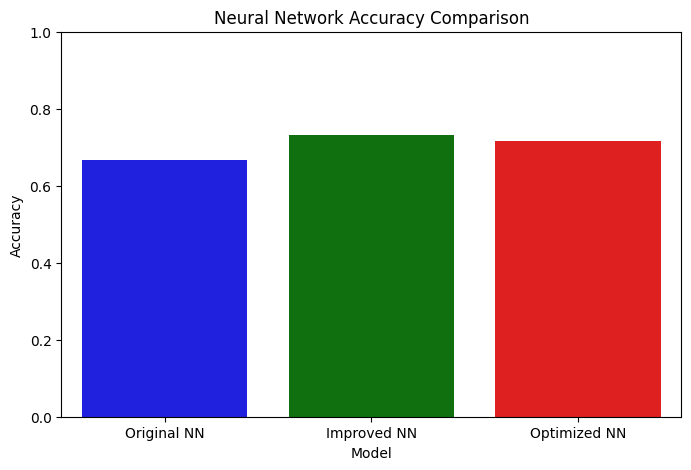

In [ ]:
results_nn_df = pd.DataFrame({
    "Model": ["Original NN", "Improved NN", "Optimized NN"],
    "Accuracy": [accuracy_nn, accuracy_nn_tuned, accuracy_nn_optimized],
})


print(results_nn_df)
#  Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_nn_df["Model"], y=results_nn_df["Accuracy"], palette=["blue", "green", "red"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Neural Network Accuracy Comparison")
plt.show()


We improved the architecture of our neural network to increase accuracy and reduce overfitting, ensuring better generalization to unseen data.

Key Improvements in the Architecture:

1️.Increased Dropout Rate (from 30% → 40%)
Helps prevent overfitting by randomly deactivating neurons during training.

2️. Reduced the Number of Neurons per Layer
Prevents unnecessary complexity, making the model more efficient.

3️. Added L2 Regularization
Introduces a penalty for large weights, which reduces overfitting and stabilizes learning.

4️. Increased Batch Size (from 32 → 64)
Larger batch sizes help stabilize gradient updates and improve convergence.

5️. Implemented Early Stopping
Stops training automatically when validation loss stops improving, preventing unnecessary overfitting.

6️. Fine-tuned Learning Rate (0.0005)
A lower learning rate ensures smoother weight updates, leading to better convergence.

**13-Propose a New Metric & Analyze Its Behavior**

In [ ]:
# Get predictions
y_pred_original = model.predict(X_test)
y_pred_improved = model_improved.predict(X_test)

# Convert probabilities to class labels
y_pred_original_classes = tf.argmax(y_pred_original, axis=1).numpy()
y_pred_improved_classes = tf.argmax(y_pred_improved, axis=1).numpy()

# Compute Macro F1-Score
f1_original = f1_score(y_test, y_pred_original_classes, average='macro')
f1_improved = f1_score(y_test, y_pred_improved_classes, average='macro')

# Display F1-Scores
print(f" Original NN - Macro F1-Score: {f1_original:.4f}")
print(f" Improved NN - Macro F1-Score: {f1_improved:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
 Original NN - Macro F1-Score: 0.6348
 Improved NN - Macro F1-Score: 0.6806


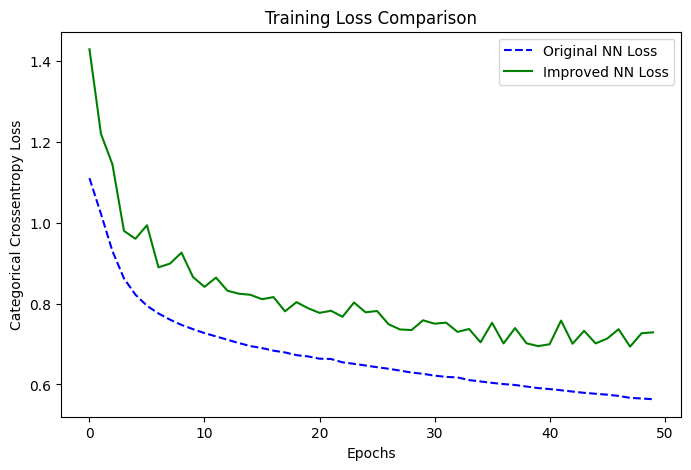

In [ ]:
# Plot Training Loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Original NN Loss', linestyle='dashed', color='blue')
plt.plot(history_improved.history['loss'], label='Improved NN Loss', color='green')

plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()


**14 - Adjusting Data Balance & Evaluating Impact**

In [ ]:
# Define sampling strategies
balanced_strategy = {0: 200, 1: 200, 2: 200}  # Fully balanced
moderate_imbalance_strategy = {0: 300, 1: 150, 2: 100}  # Slight imbalance
severe_imbalance_strategy = {0: 400, 1: 100, 2: 50}  # High imbalance

# Apply resampling methods
sampler_balanced = RandomUnderSampler(sampling_strategy=balanced_strategy, random_state=42)
sampler_moderate = RandomUnderSampler(sampling_strategy=moderate_imbalance_strategy, random_state=42)
sampler_severe = RandomUnderSampler(sampling_strategy=severe_imbalance_strategy, random_state=42)

X_balanced, y_balanced = sampler_balanced.fit_resample(X, y)
X_moderate, y_moderate = sampler_moderate.fit_resample(X, y)
X_severe, y_severe = sampler_severe.fit_resample(X, y)


# Train models for each dataset
datasets = {
    "Balanced": (X_balanced, y_balanced),
    "Moderately Imbalanced": (X_moderate, y_moderate),
    "Severely Imbalanced": (X_severe, y_severe),
}

results_imbalance = {}

for name, (X_data, y_data) in datasets.items():
    X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_bal, y_train_bal)

    y_pred_bal = clf.predict(X_test_bal)

    accuracy = accuracy_score(y_test_bal, y_pred_bal)
    f1 = f1_score(y_test_bal, y_pred_bal, average='macro')

    results_imbalance[name] = {"Accuracy": accuracy, "Macro F1-Score": f1}

# Convert results into a DataFrame
results_imbalance_df = pd.DataFrame(results_imbalance).T

# Display results
print(results_imbalance_df)


                       Accuracy  Macro F1-Score
Balanced               0.758333        0.747017
Moderately Imbalanced  0.754545        0.675385
Severely Imbalanced    0.809091        0.613649


<ipython-input-97-f3343ac6b2bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_imbalance_df.index, y=results_imbalance_df["Accuracy"], palette=["green", "orange", "red"])


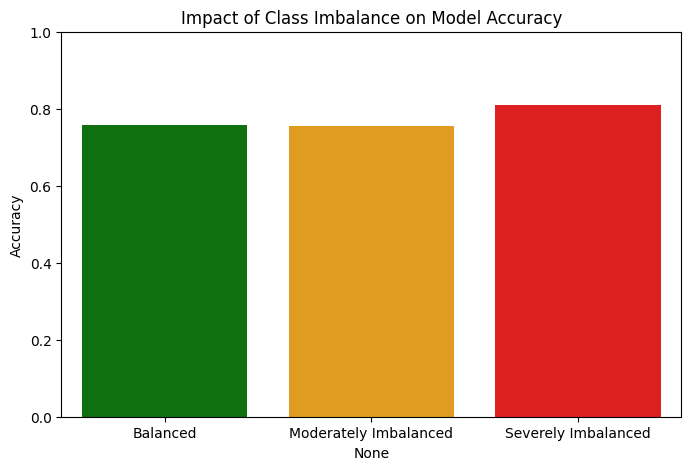

<ipython-input-97-f3343ac6b2bf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_imbalance_df.index, y=results_imbalance_df["Macro F1-Score"], palette=["green", "orange", "red"])


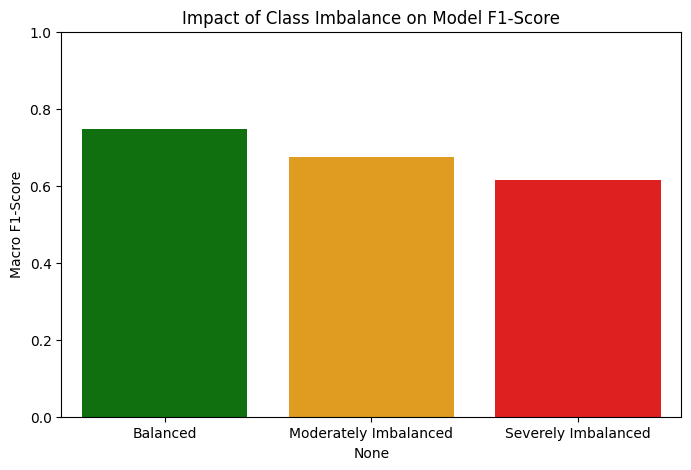

In [ ]:
#  Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_imbalance_df.index, y=results_imbalance_df["Accuracy"], palette=["green", "orange", "red"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Impact of Class Imbalance on Model Accuracy")
plt.show()

#  Macro F1-Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_imbalance_df.index, y=results_imbalance_df["Macro F1-Score"], palette=["green", "orange", "red"])
plt.ylim(0, 1)
plt.ylabel("Macro F1-Score")
plt.title("Impact of Class Imbalance on Model F1-Score")
plt.show()


**15-Dimensionality Reduction & Model Performance**

In [ ]:
# Reduce to 10 principal components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Display explained variance ratio
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f" Total Variance Retained: {explained_variance:.2%}")


 Total Variance Retained: 100.00%


In [ ]:
# Split data with reduced features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier on the reduced dataset
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_pca)

# Evaluate performance
y_pred_pca = clf_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
f1_pca = f1_score(y_test_pca, y_pred_pca, average='macro')

print(f" Model Performance After PCA:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Macro F1-Score: {f1_pca:.4f}")


 Model Performance After PCA:
Accuracy: 0.7011
Macro F1-Score: 0.6751


         Model  Accuracy  Macro F1-Score
0     Original  0.666667        0.634751
1  PCA-Reduced  0.701087        0.675052


<ipython-input-100-915021e78c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_pca_df["Model"], y=results_pca_df["Accuracy"], palette=["blue", "purple"])


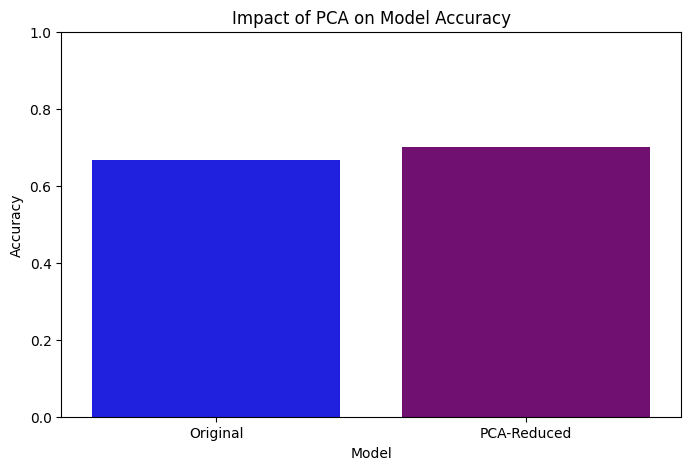

<ipython-input-100-915021e78c10>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_pca_df["Model"], y=results_pca_df["Macro F1-Score"], palette=["blue", "purple"])


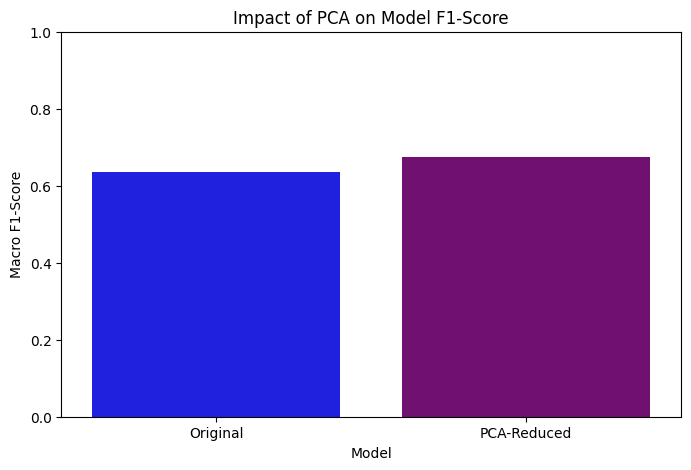

In [ ]:
# Compare performance
results_pca_df = pd.DataFrame({
    "Model": ["Original", "PCA-Reduced"],
    "Accuracy": [accuracy_nn, accuracy_pca],
    "Macro F1-Score": [f1_original, f1_pca]
})

print(results_pca_df)
#  Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_pca_df["Model"], y=results_pca_df["Accuracy"], palette=["blue", "purple"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Impact of PCA on Model Accuracy")
plt.show()

#  F1-Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_pca_df["Model"], y=results_pca_df["Macro F1-Score"], palette=["blue", "purple"])
plt.ylim(0, 1)
plt.ylabel("Macro F1-Score")
plt.title("Impact of PCA on Model F1-Score")
plt.show()
